# **Memoria EDA.**

## **Codigo: Imports, diccionario y función.**

Imports de las librerias utilizadas:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Diccionario Comunidades autonomas:

In [3]:
# Diccionario Comunidades autonomas.
comunidades_autonomas = {
    'Total Nacional': [],
    'País Vasco': [],
    'Comunidad de Madrid': [],
    'Ceuta': [],
    'Comunidad Foral de Navarra': [],
    'Cataluña': [],
    'Melilla': [],
    'Total Nacional': [],
    'Principado de Asturias': [],
    'Aragón': [],
    'Cantabria': [],
    'Illes Balears': [],
    'La Rioja': [],
    'Castilla y León': [],
    'Comunitat Valenciana': [],
    'Galicia': [],
    'Región de Murcia': [],
    'Castilla - La Mancha': [],
    'Andalucía': [],
    'Canarias': [],
    'Extremadura': []
}

Función para guardar las posiciones en el diccionario:

In [4]:
# FUNCIÓN PARA GUARDAR PUNTUACIONES EN EL DICCIONARIO.
def guardar_puntuacion(df):
    for i, fila in enumerate(df.iterrows()):
        fila = re.sub(r' +', ' ', fila[1]["Comunidades y Ciudades Autónomas"])
        comunidades_autonomas[fila].append(i + 1)

## **Situación laboral.**

### Salario.

In [6]:
# Salario medio en España por Comunidades Autonomas. Datos INE.
# Salario bruto anual.

df_salario = pd.read_csv("data/salario_edad_sexo.csv", sep=";")
df_salario = df_salario[df_salario["Edad del trabajador"] == "Todas las edades"]
df_salario = df_salario[df_salario["Sexo"] == "Ambos sexos"]
df_salario = df_salario[df_salario["Periodo"] == 2021]
df_salario.reset_index(inplace=True)
# Limpio los Strings de las comunidades.
df_salario['Comunidades y Ciudades Autónomas'] = df_salario['Comunidades y Ciudades Autónomas'].str.replace('^(.*), (.*)$', r'\2 \1', regex=True)
# Formateo y cambio el tipo de los datos de la columna Total.
df_salario["Total"] = df_salario["Total"].str.replace('.', '')
df_salario["Total"] = df_salario["Total"].str.replace(',', '.')
df_salario["Total"] = pd.to_numeric(df_salario["Total"], errors='coerce')
# Ordeno los resultados
df_salario = df_salario.sort_values(by="Total", ascending=False)
# Guardo la puntuación en el diccionario.
guardar_puntuacion(df_salario)
df_salario

,index,Comunidades y Ciudades Autónomas,Edad del trabajador,Sexo,Periodo,Total
16,4032,País Vasco,Todas las edades,Ambos sexos,2021,31063.68
13,3276,Comunidad de Madrid,Todas las edades,Ambos sexos,2021,29512.58
18,4536,Ceuta,Todas las edades,Ambos sexos,2021,28628.08
15,3780,Comunidad Foral de Navarra,Todas las edades,Ambos sexos,2021,28459.37
9,2268,Cataluña,Todas las edades,Ambos sexos,2021,28145.02
19,4537,Melilla,Todas las edades,Ambos sexos,2021,27987.96
0,0,Total Nacional,Todas las edades,Ambos sexos,2021,25896.82
3,756,Principado de Asturias,Todas las edades,Ambos sexos,2021,25046.60
2,504,Aragón,Todas las edades,Ambos sexos,2021,25011.55
6,1512,Cantabria,Todas las edades,Ambos sexos,2021,24470.70


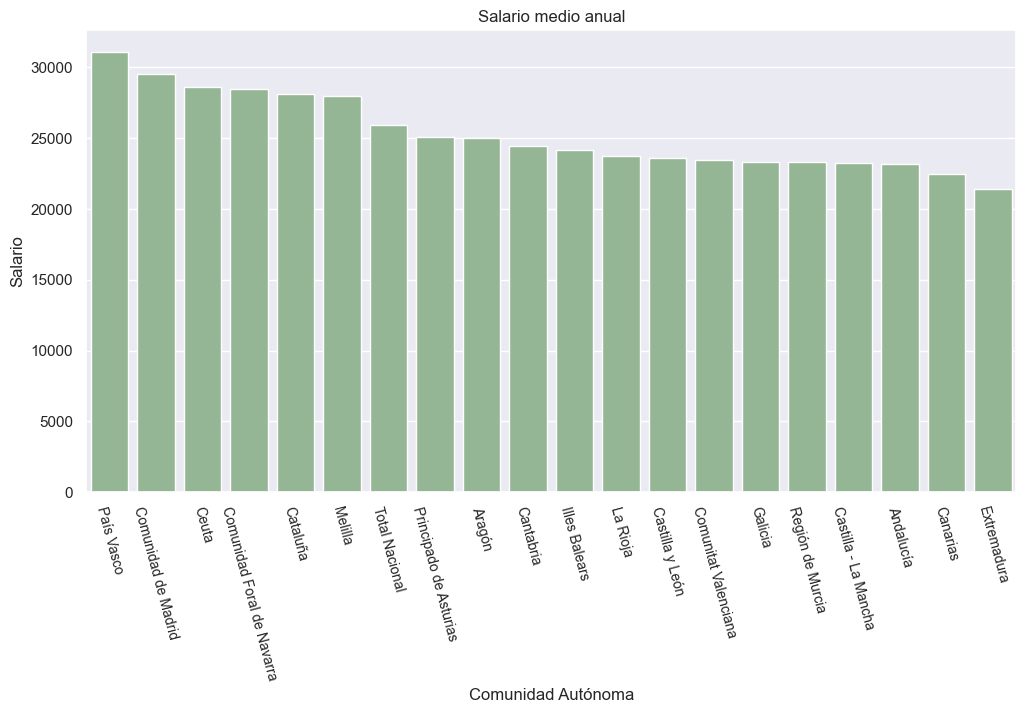

In [7]:
# Creo el grafico de barras con el salario medio anual de cada Comunidad Autonoma.
sns.set_style("whitegrid");
sns.set(rc={"figure.figsize": (12, 6)});
sns.barplot(x="Comunidades y Ciudades Autónomas", y="Total", data=df_salario, color = "darkseagreen", saturation = 0.75);

plt.xticks(rotation=-75, fontsize=10);
plt.xlabel("Comunidad Autónoma");
plt.ylabel("Salario");
plt.title("Salario medio anual");

### Tasa de paro.

Grafica que muestra el porcentaje de población en paro de la comunidad.

In [9]:
# Tasa de paro por comunidades. Fuente INE 2023 t2
# Representa el porcentaje de paro de la comunidad.
df_paro = pd.read_csv('data/tasa_paro.csv', sep=";")
df_paro = df_paro[df_paro["Periodo"] == "2023T2"]
# Limpio los Strings de las comunidades.
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.strip()
df_paro["Total"] = df_paro["Total"].str.replace(',', '.', regex=True).astype(float)
# Ordeno los resultados.
df_paro = df_paro.sort_values(by="Total", ascending=False)
# Guardo la puntuación en el diccionario.
guardar_puntuacion(df_paro)
df_paro

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
36,Ambos sexos,Ceuta,Total,2023T2,27.37
38,Ambos sexos,Melilla,Total,2023T2,19.42
2,Ambos sexos,Andalucía,Total,2023T2,18.05
22,Ambos sexos,Extremadura,Total,2023T2,17.05
10,Ambos sexos,Canarias,Total,2023T2,15.25
16,Ambos sexos,Castilla - La Mancha,Total,2023T2,13.01
28,Ambos sexos,Región de Murcia,Total,2023T2,12.35
20,Ambos sexos,Comunitat Valenciana,Total,2023T2,12.20
0,Ambos sexos,Total Nacional,Total,2023T2,11.60
6,Ambos sexos,Principado de Asturias,Total,2023T2,10.45


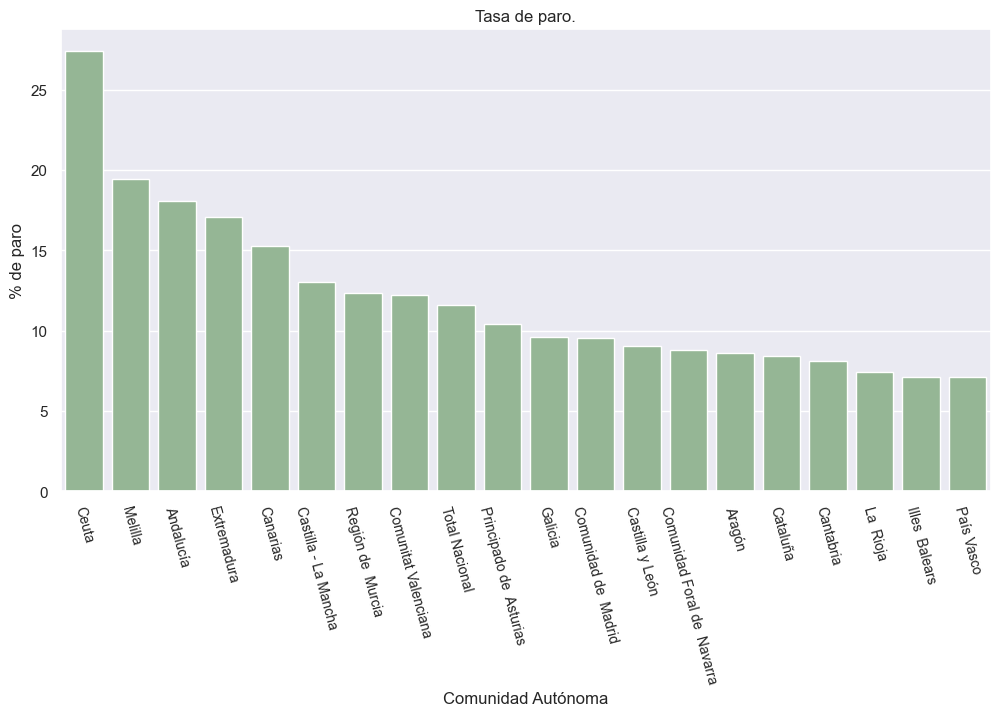

In [10]:
# Creo el grafico de barras con la tasa de paro de cada Comunidad Autonoma.
sns.set_style("whitegrid");
sns.set(rc={"figure.figsize": (12, 6)});
sns.barplot(x="Comunidades y Ciudades Autónomas", y="Total", data=df_paro, color = "darkseagreen", saturation = 0.75);
#plt.bar(6, df_salario["Comunidades y Ciudades Autónomas"][6], color='red');
plt.xticks(rotation=-75, fontsize=10);
plt.xlabel("Comunidad Autónoma");
plt.ylabel("% de paro");
plt.title("Tasa de paro.");

## **Vivienda.**

### IPV de la vivienda.
El IPV es el Indice del Precio de la Vivienda. Tiene como objetivo la medición de la evolución de los precios de compraventa de las viviendas de precio libre, tanto nuevas como de segunda mano, a lo largo del tiempo.

Cuanto mas alto es el IPV mas valor tienen las viviendas en esa comunidad.

In [86]:
# IPV de la vivienda por Comunidades Autonomas. Datos INE.
# valor IPV.

df_ipv = pd.read_csv("data/IPV_vivienda_CCAA.csv", sep=";")
df_ipv = df_ipv[df_ipv["Índices y tasas"] == "Índice"]
df_ipv = df_ipv[df_ipv["General, vivienda nueva y de segunda mano"] == "General"]
df_ipv = df_ipv[df_ipv["Periodo"] == "2023T2"]
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].fillna("Total Nacional")
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_ipv["Total"] = df_ipv["Total"].str.replace(',', '.')
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.strip()

df_ipv = df_ipv.sort_values(by="Total", ascending=False)
df_ipv["Total"] = pd.to_numeric(df_ipv["Total"], errors='coerce')

guardar_puntuacion(df_ipv)
df_ipv

,Total Nacional,Comunidades y Ciudades Autónomas,"General, vivienda nueva y de segunda mano",Índices y tasas,Periodo,Total
10296,Nacional,Comunidad de Madrid,General,Índice,2023T2,162.841
3168,Nacional,Illes Balears,General,Índice,2023T2,162.183
14256,Nacional,Ceuta,General,Índice,2023T2,161.660
15048,Nacional,Melilla,General,Índice,2023T2,160.434
7128,Nacional,Cataluña,General,Índice,2023T2,156.147
0,Nacional,Total Nacional,General,Índice,2023T2,146.583
3960,Nacional,Canarias,General,Índice,2023T2,143.283
792,Nacional,Andalucía,General,Índice,2023T2,142.672
4752,Nacional,Cantabria,General,Índice,2023T2,142.467
1584,Nacional,Aragón,General,Índice,2023T2,136.449


In [27]:
print(comunidades_autonomas)

{'Total Nacional': [7, 9, 6], 'País Vasco': [1, 20, 11], 'Comunidad de Madrid': [2, 12, 1, 1], 'Ceuta': [3, 1, 3], 'Comunidad Foral de Navarra': [4, 14, 16], 'Cataluña': [5, 16, 5], 'Melilla': [6, 2, 4], 'Principado de Asturias': [8, 10, 17], 'Aragón': [9, 15, 10], 'Cantabria': [10, 17, 9], 'Illes Balears': [11, 19, 2, 2], 'La Rioja': [12, 18, 13], 'Castilla y León': [13, 13, 18], 'Comunitat Valenciana': [14, 8, 12], 'Galicia': [15, 11, 15], 'Región de Murcia': [16, 7, 14], 'Castilla - La Mancha': [17, 6, 19], 'Andalucía': [18, 3, 8], 'Canarias': [19, 5, 7], 'Extremadura': [20, 4, 20]}


Text(0.5, 1.0, 'Indice del Precio de la Vivienda por Comunidad Autonoma.')

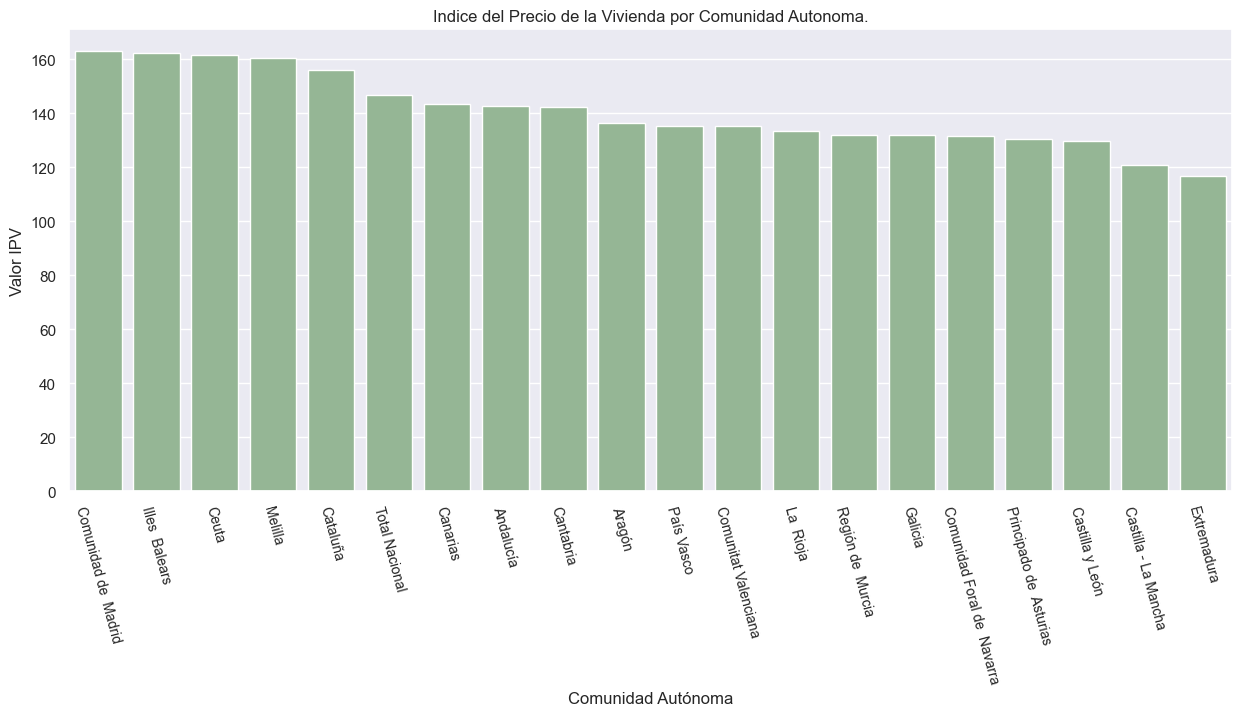

In [145]:
sns.set(rc={"figure.figsize": (15, 6)})
sns.barplot(x="Comunidades y Ciudades Autónomas", y="Total", data=df_ipv, color = "darkseagreen", saturation = 0.75)
plt.xticks(rotation=-75, fontsize=10);
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Valor IPV")
plt.title("Indice del Precio de la Vivienda por Comunidad Autonoma.")


## **Gastos.**

In [87]:
# Gasto medio en España por Comunidades Autonomas. Datos INE.
# Indice general = Alimentos, bebidas, tabaco, ropa, vivienda, conbustibles, sanidad, transporte, mantenimiento del hogar, comunicaciones, ocio y cultura, enseñanza.

"""
Datos filtrados:
    - De la columna "Índices y tasasr" he filtrado para mostrar unicamente el indice general.
    - De la columna "General, vivienda nueva y de segunda mano" he filtrado para mostrar unicamente el IPV generales.
    - De la columna "Periodo" he filtrado para mostrar unicamente los datos del ultimo trimestre registrado de 2023.
"""

df_gastos = pd.read_csv("data/gastos_medios.csv", sep=";")
df_gastos = df_gastos[df_gastos["Comunidades y Ciudades Autónomas"] != "Total Nacional"]
df_gastos = df_gastos[df_gastos["Periodo"] == 2022]
df_gastos = df_gastos[df_gastos["Grupos de gasto (2 dígitos)"] == "Índice general"]
df_gastos = df_gastos[df_gastos["Gastos totales, medios y distribución porcentual"] == "Gasto medio por persona"]
df_gastos = df_gastos[df_gastos["Tipo de dato"] == "Dato base"]


df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.strip()

df_gastos["Total"] = df_gastos["Total"].str.replace('.', '')
df_gastos["Total"] = df_gastos["Total"].str.replace(',', '.')


df_gastos["Total"] = pd.to_numeric(df_gastos["Total"], errors='coerce')

df_gastos = df_gastos.sort_values(by="Total", ascending=False)
guardar_puntuacion(df_gastos)
df_gastos

,Comunidades y Ciudades Autónomas,Tipo de dato,"Gastos totales, medios y distribución porcentual",Grupos de gasto (2 dígitos),Periodo,Total
53703,País Vasco,Dato base,Gasto medio por persona,Índice general,2022,15103.46
43758,Comunidad de Madrid,Dato base,Gasto medio por persona,Índice general,2022,14325.91
50388,Comunidad Foral de Navarra,Dato base,Gasto medio por persona,Índice general,2022,14189.64
13923,Illes Balears,Dato base,Gasto medio por persona,Índice general,2022,13714.51
30498,Cataluña,Dato base,Gasto medio por persona,Índice general,2022,13478.76
10608,Principado de Asturias,Dato base,Gasto medio por persona,Índice general,2022,13364.23
7293,Aragón,Dato base,Gasto medio por persona,Índice general,2022,13337.96
23868,Castilla y León,Dato base,Gasto medio por persona,Índice general,2022,13187.73
40443,Galicia,Dato base,Gasto medio por persona,Índice general,2022,13007.95
66300,Total Nacional,Dato base,Gasto medio por persona,Índice general,2022,12541.59


Text(0.5, 1.0, 'Gastos medios por persona en cada Comunidad Autonoma.')

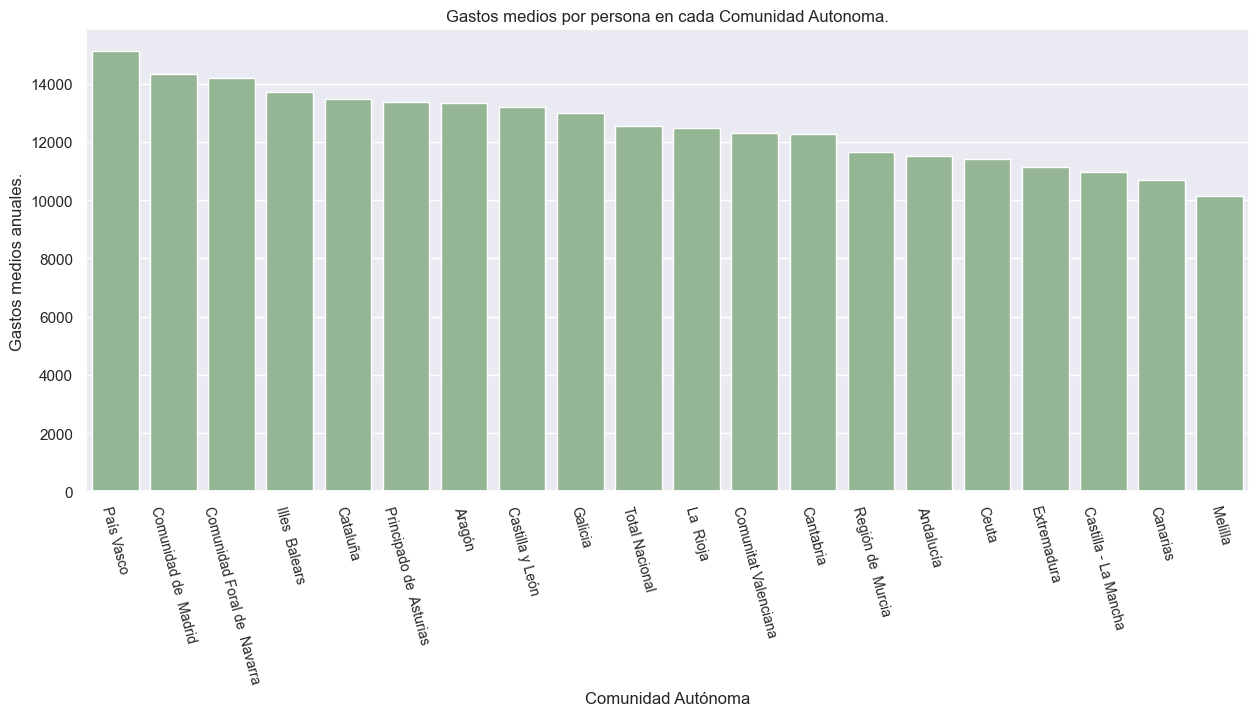

In [146]:
sns.set(rc={"figure.figsize": (15, 6)})
sns.barplot( x="Comunidades y Ciudades Autónomas", y="Total", data=df_gastos, color = "darkseagreen", saturation = 0.75)
plt.xticks(rotation=-75, fontsize=10);
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Gastos medios anuales.")
plt.title("Gastos medios por persona en cada Comunidad Autonoma.")

In [58]:
print(comunidades_autonomas)

{'Total Nacional': [7, 9, 6], 'País Vasco': [1, 20, 11, 1], 'Comunidad de Madrid': [2, 12, 1, 2], 'Ceuta': [3, 1, 3, 15], 'Comunidad Foral de Navarra': [4, 14, 16, 3], 'Cataluña': [5, 16, 5, 5], 'Melilla': [6, 2, 4, 19], 'Principado de Asturias': [8, 10, 17, 6], 'Aragón': [9, 15, 10, 7], 'Cantabria': [10, 17, 9, 12], 'Illes Balears': [11, 19, 2, 4], 'La Rioja': [12, 18, 13, 10], 'Castilla y León': [13, 13, 18, 8], 'Comunitat Valenciana': [14, 8, 12, 11], 'Galicia': [15, 11, 15, 9], 'Región de Murcia': [16, 7, 14, 13], 'Castilla - La Mancha': [17, 6, 19, 17], 'Andalucía': [18, 3, 8, 14], 'Canarias': [19, 5, 7, 18], 'Extremadura': [20, 4, 20, 16]}


# **Hipotesis:**

### Ver si la calidad de vida cambia mucho dependiendo de la comunidad o es similar a nivel nacional.

In [125]:
df_total = pd.DataFrame(comunidades_autonomas)
df_total

,Total Nacional,País Vasco,Comunidad de Madrid,Ceuta,Comunidad Foral de Navarra,Cataluña,Melilla,Principado de Asturias,Aragón,Cantabria,Illes Balears,La Rioja,Castilla y León,Comunitat Valenciana,Galicia,Región de Murcia,Castilla - La Mancha,Andalucía,Canarias,Extremadura
0,7,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20
1,9,20,12,1,14,16,2,10,15,17,19,18,13,8,11,7,6,3,5,4
2,6,11,1,3,16,5,4,17,10,9,2,13,18,12,15,14,19,8,7,20
3,10,1,2,16,3,5,20,6,7,13,4,11,8,12,9,14,18,15,19,17


C:\Users\diego\AppData\Local\Temp\ipykernel_19176\2851000174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=medias_ordenadas.index, y=medias_ordenadas.values, palette=colors)


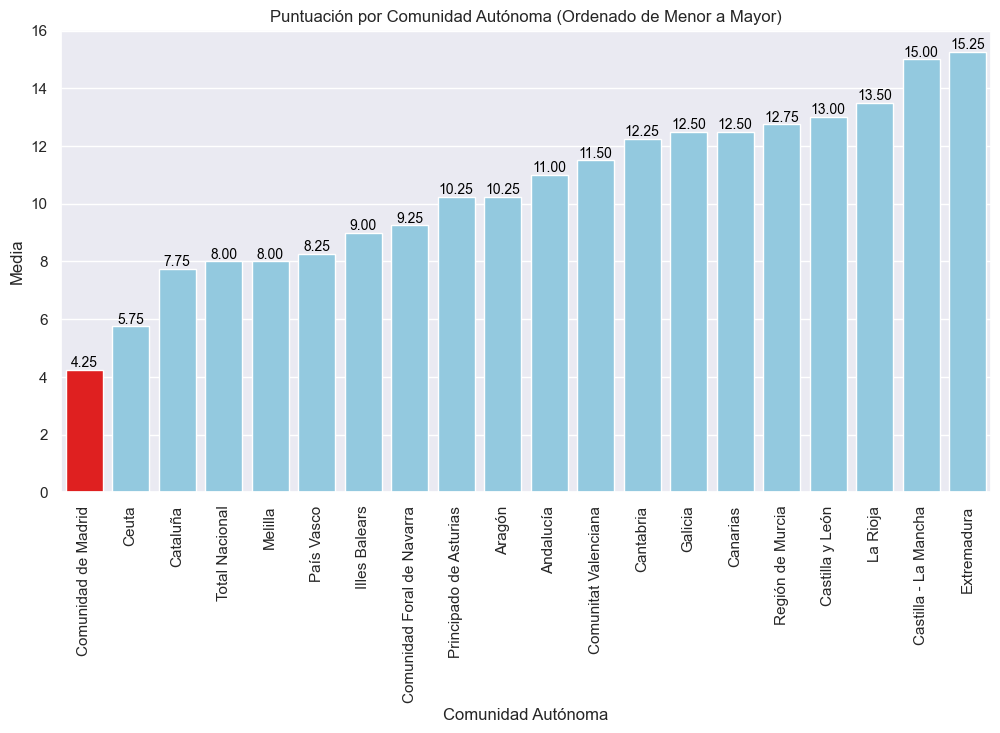

In [143]:
medias = df_total.mean()
medias_ordenadas = medias.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
colors = ['skyblue' if comunidad != 'Total Nacional' else 'red' for comunidad in df_total]
ax = sns.barplot(x=medias_ordenadas.index, y=medias_ordenadas.values, palette=colors)
plt.title('Puntuación por Comunidad Autónoma (Ordenado de Menor a Mayor)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Media')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


### La relación entre el PIB per cápita de cada comunidad y la calidad de vida de sus ciudadanos.

In [18]:
df_pib = pd.read_csv("data/pib.csv", sep=";")
df_pib

,index,Comunidades y Ciudades Autónomas,Año,Total
0,1,Andalucía,2021,18906
1,2,Aragón,2021,28912
2,3,Principado de Asturias,2021,23235
3,4,Illes Balears,2021,24866
4,5,Canarias,2021,18990
5,6,Cantabria,2021,23730
6,7,Castilla y León,2021,24428
7,8,Castilla - La Mancha,2021,20655
8,9,Cataluña,2021,29942
9,10,Comunitat Valenciana,2021,22289


Text(0.5, 1.0, 'Comparación de Valores entre dos DataFrames')

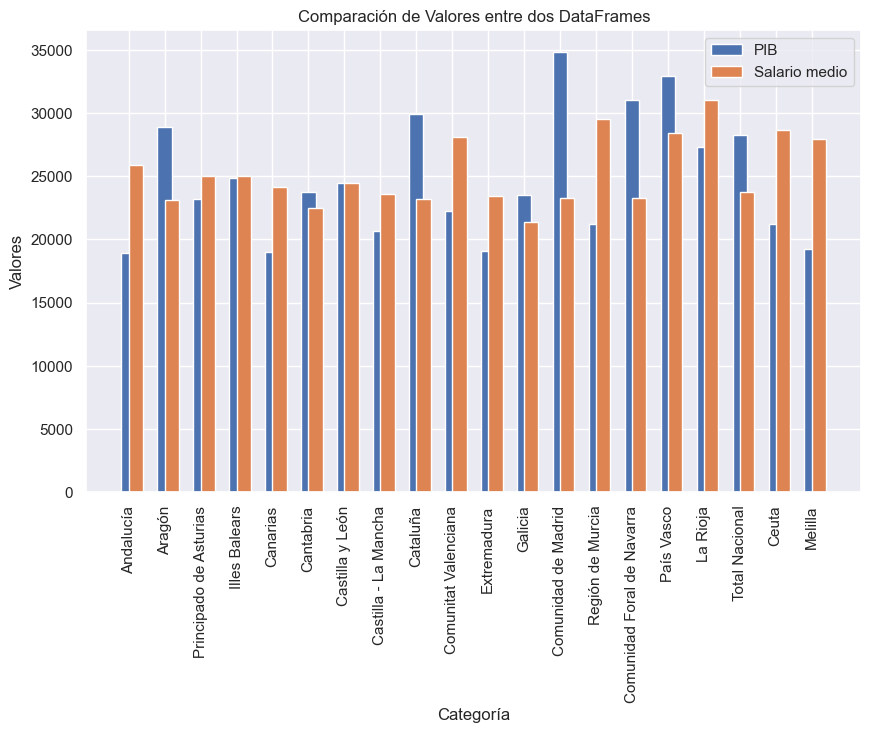

In [30]:
df_merged = df_pib.merge(df_salario, left_index=True, right_index=True)
plt.figure(figsize=(10, 6))
plt.bar(df_merged['Comunidades y Ciudades Autónomas_x'], df_merged['Total_x'], width=0.4, label='PIB', align='center')
plt.bar(df_merged['Comunidades y Ciudades Autónomas_x'], df_merged['Total_y'], width=0.4, label='Salario medio', align='edge')
plt.xlabel('Categoría')
plt.ylabel('Valores')
plt.xticks(rotation=90) 
plt.legend()
plt.title('Comparación de Valores entre dos DataFrames')